# Data Science Coronavírus

### Importando as bibliotecas para processamento

In [1]:
import pandas as pd
import numpy as np

### Armazenando os Links do Dataset em uma Lista

In [2]:
#Base de dados
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data?fbclid=IwAR1C6Cf_k5bpeEF5v1I9G-OlXeMZd0B1JreUw4ayc5tuOLYVSKvyunFaam8

base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports'
lista_links = []
#Pegando os links do mês de janeiro
for c in range(22, 32):
    lista_links.append(str(base_url+f'/01-{c}-2020.csv'))
#Pegando os links do mês de fevereiro
for c in range(1, 30):
    if c <= 9:
        lista_links.append(str(base_url+f'/02-0{c}-2020.csv'))
    else:
        lista_links.append(str(base_url+f'/02-{c}-2020.csv'))
#Pegando os links do mês de março
for c in range(1, 4):
    if c <= 9:
        lista_links.append(str(base_url+f'/03-0{c}-2020.csv'))
    else:
        lista_links.append(str(base_url+f'/03-{c}-2020.csv'))

### Convertendo os Links em um Dataframe e Armazenando em uma Lista

In [3]:
lista = []
for c in lista_links:
    dados = pd.read_csv(c)
    np.array(dados)
    lista.append(dados)

### Visualizando e Descrevendo os Dados 

In [4]:
#Vamos visualizar uma tabela individualmente para observamos as suas colunas 
lista[0].head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN


In [5]:
lista[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
Province/State    35 non-null object
Country/Region    38 non-null object
Last Update       38 non-null object
Confirmed         29 non-null float64
Deaths            1 non-null float64
Recovered         1 non-null float64
dtypes: float64(3), object(3)
memory usage: 1.9+ KB


In [6]:
round(lista[0].describe(),2)

,Confirmed,Deaths,Recovered
count,29.00,1.0,1.0
mean,19.14,17.0,28.0
std,81.88,NaN,NaN
min,1.00,17.0,28.0
25%,1.00,17.0,28.0
50%,2.00,17.0,28.0
75%,5.00,17.0,28.0
max,444.00,17.0,28.0


### Criando as Listas que serão utilizadas para plotar o gráfico

In [7]:
lista_mortos = []
lista_casos_confirmados = []
lista_recuperados = []

for c in range(0,len(lista)):
    lista_mortos.append((lista[c]['Deaths']).sum())
    lista_casos_confirmados.append((lista[c]['Confirmed']).sum())
    lista_recuperados.append((lista[c]['Recovered']).sum())

### Plotando o Gráfico

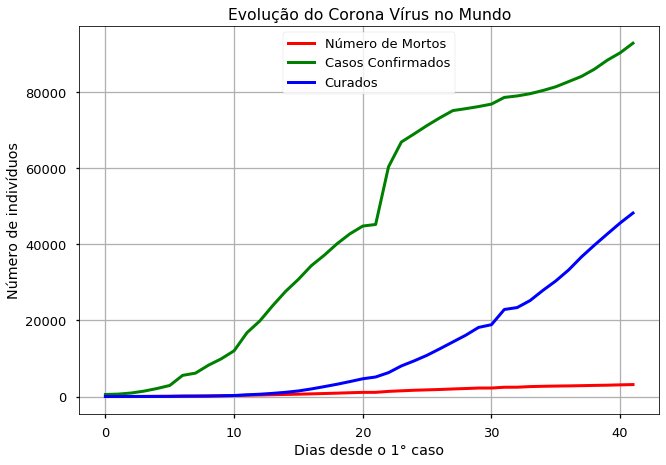

In [8]:
import matplotlib.pyplot as plt
x = [i for i in range(0, len(lista_mortos))]
plt.style.use('seaborn-talk')
y_mortos = lista_mortos
y_casos_confirmados = lista_casos_confirmados
y_recuperados = lista_recuperados
plt.plot(x, y_mortos, color='red', label='Número de Mortos', linewidth=3.0)
plt.plot(x, y_casos_confirmados, color='green', label='Casos Confirmados', linewidth=3.0)
plt.plot(x, y_recuperados, color='blue', label='Curados', linewidth=3.0)
plt.xlabel('Dias desde o 1° caso')
plt.ylabel('Número de indivíduos')
plt.title('Evolução do Corona Vírus no Mundo')
#fig = plt.gcf()
#fig.set_size_inches(10, 8)
plt.grid(True)
plt.legend(loc='upper center')
plt.savefig('corona.png')
plt.show()


### Estilos Disponíveis

In [9]:
#Para consultar os estilos disponíveis, rode esse código
np.reshape(plt.style.available, (1,-1))

array([['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight',
        'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind',
        'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid',
        'seaborn-deep', 'seaborn-muted', 'seaborn-notebook',
        'seaborn-paper', 'seaborn-pastel', 'seaborn-poster',
        'seaborn-talk', 'seaborn-ticks', 'seaborn-white',
        'seaborn-whitegrid', 'seaborn', 'Solarize_Light2',
        'tableau-colorblind10', '_classic_test']], dtype='<U20')

### Criando outro Dataframe com os dados mais atuais

In [10]:
dados_atuais = {'Número de Mortos':y_mortos[len(y_mortos)-1],
                'Casos Confirmados':y_casos_confirmados[len(y_casos_confirmados)-1],
                'Curados':y_recuperados[len(y_recuperados)-1]}

In [11]:
dados_atuais = pd.DataFrame([dados_atuais])

In [12]:
dados_atuais

,Número de Mortos,Casos Confirmados,Curados
0,3160,92844,48229


### Calculando a Taxa de Mortalidade do Vírus

In [13]:
#Taxa de Mortalidade do vírus
dados_atuais['Taxa_Mortalidade(%)'] = (dados_atuais['Número de Mortos']/dados_atuais['Casos Confirmados'])*100
dados_atuais

,Número de Mortos,Casos Confirmados,Curados,Taxa_Mortalidade(%)
0,3160,92844,48229,3.403559


### Criando um Mapa de Calor com alguns lugares afetados pelo Vírus

In [14]:
import folium
from folium.plugins import HeatMap
mapa = folium.Map(location=[10,10],zoom_start=1.5,tiles='Stamen Toner')
locais = []

for x,i in zip(lista[len(lista)-1]['Latitude'], lista[len(lista)-1]['Longitude']):
    temp = [x,i]
    locais.append(temp)
HeatMap(locais, radius=20).add_to(mapa)
mapa.save('corona_mapa.html')

In [15]:
mapa